<a href="https://colab.research.google.com/github/hamakim94/CNN_Project/blob/seoyeon%2Fw2v/w2v_0808.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 설치

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 56.9MB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
     |████████████████████████████████| 3.8MB 37.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded,

In [3]:
!pip install gensim

# Word2Vec

In [74]:
import csv
from konlpy.tag import Okt
from gensim.models import word2vec
from tqdm import tqdm

 #네이버 영화 코퍼스를 읽는다.
f = open('/content/drive/My Drive/ CNN_project/ratings_train.txt', 'r', encoding='utf-8')
rdr = csv.reader(f, delimiter='\t')
rdw = list(rdr)
f.close()

 #트위터 형태소 분석기를 로드한다. Twiter가 KoNLPy v0.4.5 부터 Okt로 변경 되었다.
twitter = Okt()

#텍스트를 한줄씩 처리합니다.
result = []
for line in tqdm(rdw):
  #형태소 분석하기, 단어 기본형 사용
  malist = twitter.pos( line[1], norm=True, stem=True)
  r = []
  for word in malist:
      
      if not word[1] in ["Josa","Eomi","Punctuation"]:
          r.append(word[0])
  #형태소 사이에 공백 " "  을 넣습니다. 그리고 양쪽 공백을 지웁니다.
  rl = (" ".join(r)).strip()
  result.append(rl)
  #print(rl)

#형태소들을 별도의 파일로 저장 합니다.
with open("NaverMovie.nlp",'w', encoding='utf-8') as fp:
  fp.write("\n".join(result))

#Word2Vec 모델 만들기
wData = word2vec.LineSentence("NaverMovie.nlp")
wModel =word2vec.Word2Vec(wData, size=50, window=10, hs=1, min_count=2, sg=1)
wModel.save("NaverMovie.model")
print("Word2Vec Modeling finished")

100%|██████████| 150001/150001 [20:17<00:00, 123.24it/s]
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Word2Vec Modeling finished


In [75]:
from gensim.models import word2vec

model = word2vec.Word2Vec.load("NaverMovie.model")


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [97]:
def pad_sequence(sentences, padding_word="<PAD/>"): #  오른쪽을 패딩주기
    maxlen = 40
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        if len(sentence)<=maxlen:
            num_padding = maxlen - len(sentence)
            new_sentence = sentence + [padding_word] * num_padding
        else : new_sentence = sentence[:maxlen]
        padded_sentences.append(new_sentence)
    return padded_sentences

TypeError: ignored

In [100]:
def vectorize(padded_sentences, max_len = 40):
    model = word2vec.Word2Vec.load("NaverMovie.model")
    paddedarray = np.array([model.wv.word_vec(token) for x in padded_sentences for token in x])
    final_array = paddedarray.reshape(-1,max_len,300)
    return final_array

In [ ]:
vectorize()

In [107]:
token_train_data, train_lable = train_data['tokens'], train_data['labels']
token_test_data, test_lable = test_data['tokens'], test_data['labels']

In [111]:
token_train_data, train_lable 

(0                                  [더빙, 진짜, 짜증나다, 목소리]
 1                 [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다]
 2                                 [무재, 밓었, 다그, 래서, 추천]
 3                 [교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]
 4         [몬페, 의, 익살스럽다, 연기, 영화, 스파이더맨, 커스틴, 던스트, 이쁘다]
                               ...                     
 145786                                 [인간, 문제, 소, 죄인]
 145787                                        [평점, 낮다]
 145788                  [이, 뭐, 한국인, 먹거리, 필리핀, 혼혈, 착하다]
 145789                 [청춘, 영화, 최고봉, 방황, 우울하다, 날, 자화상]
 145790                        [한국, 영화, 최초, 수간, 내용, 영화]
 Name: tokens, Length: 145791, dtype: object, 0         0
 1         1
 2         0
 3         0
 4         1
          ..
 145786    0
 145787    1
 145788    0
 145789    1
 145790    0
 Name: labels, Length: 145791, dtype: int64)

In [108]:
max_len=30
final_train_data = vectorize(pad_sequence(token_train_data), max_len=max_len)
final_test_data = vectorize(pad_sequence(token_test_data), max_len=max_len)



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyError: ignored

In [93]:
# train, test 명시 
training_sentences = train_data['tokens']
testing_sentences = test_data['tokens']

training_labels = train_data['labels']
testing_labels = test_data['labels']

training_sentences.shape, testing_sentences.shape, training_labels.shape, testing_labels.shape

((145791,), (48995,), (145791,), (48995,))

In [94]:

training_sentences

0                                  [더빙, 진짜, 짜증나다, 목소리]
1                 [흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다]
2                                 [무재, 밓었, 다그, 래서, 추천]
3                 [교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]
4         [몬페, 의, 익살스럽다, 연기, 영화, 스파이더맨, 커스틴, 던스트, 이쁘다]
                              ...                     
145786                                 [인간, 문제, 소, 죄인]
145787                                        [평점, 낮다]
145788                  [이, 뭐, 한국인, 먹거리, 필리핀, 혼혈, 착하다]
145789                 [청춘, 영화, 최고봉, 방황, 우울하다, 날, 자화상]
145790                        [한국, 영화, 최초, 수간, 내용, 영화]
Name: tokens, Length: 145791, dtype: object

In [76]:
model.wv.__getitem__('평점') # vector array 확인 

array([-0.07708219, -0.600916  , -0.37520993, -0.5498839 , -0.47359377,
       -0.20065634, -0.30396405, -0.31205925, -0.2752328 ,  0.71347475,
       -0.7795348 , -0.4436042 , -0.2810584 , -0.6965064 , -0.1659207 ,
        0.46699184, -0.06523939,  0.4275409 ,  0.30553058, -0.53746766,
       -0.24705829,  0.4216297 ,  0.40726438,  0.27251658,  0.30479923,
        0.3969623 , -0.39570892,  0.54794866,  0.11046416,  0.45791757,
        0.44504455, -0.3437096 , -0.30413112, -0.12929527,  0.17822967,
       -0.6593997 ,  0.09572361,  0.01179889, -0.32037172, -0.19695619,
        0.49669695,  0.00779992,  0.164905  , -0.00413117, -0.08146571,
        0.37681583, -0.2205215 , -0.16705263,  0.43013763,  0.31460422],
      dtype=float32)

In [77]:
model['평점'].shape # 차원확인

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(50,)

In [78]:
words = list(model.wv.vocab)
print(words)

len(words)

['아', '더빙', '진짜', '짜증나다', '목소리', '흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다', '않다', '너', '무재', '다그', '래서', '보다', '추천', '다', '교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정', '사이', '몬페', '그', '의', '익살스럽다', '돋보이다', '스파이더맨', '늙다', '보이다', '하다', '커스틴', '던스트', '너무나도', '이쁘다', '막', '걸음', '마', '떼다', '3', '세', '초등학교', '1', '학년', '생인', '8', '살다', 'ㅋㅋㅋ', '별', '반개', '아깝다', '움', '원작', '긴장감', '제대로', '살리다', '욕', '나오다', '이응경', '길용우', '연', '기', '생활', '몇', '년', '정말', '발', '해도', '그것', '낫다', '납치', '감금', '반복', '이', '드라마', '가족', '못', '사람', '모', '엿', '네', '액션', '있다', '안되다', '왜', '이렇게', '낮다', '꽤', '볼', '한', '데', '헐리우드', '식', '화려하다', '너무', '길들이다', '걍', '인피니트', '짱', '♥', '볼때', '눈물나다', '죽다', '90년', '대의', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인', '울면', '손', '들', '건너다', '때', '뛰다', '치다', '올', '뻔', '이범수', '드럽다', '담백하다', '깔끔하다', '좋다', '신', '문', '사', '로만', '자꾸', '잊어버리다', '이다', '것', '취향', '존중', '다지', '내생', '극장', '중', '가장', '노잼', '노', '감동', '임', '스토리', '어거지', 'ㄱ', '냥', '매번', '긴장', '되다', '재밌다', 'ㅠㅠ', '차다', '웃기

26090

word2vec array를 리스트로 만듬

In [79]:
import numpy as np

w2v_array = np.array([ model.wv.__getitem__(x) for x in words])

In [80]:
w2v_array

len(w2v_array)

26090

# Model

In [60]:

import pickle
import pandas as pd
train_data = pd.read_pickle('/content/drive/My Drive/ CNN_project/token_train_data.pkl')
test_data = pd.read_pickle('/content/drive/My Drive/ CNN_project/token_test_data.pkl')

In [61]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
from tensorflow import keras

In [106]:
train_data


,tokens,labels
0,"[더빙, 진짜, 짜증나다, 목소리]",0
1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 가볍다]",1
2,"[무재, 밓었, 다그, 래서, 추천]",0
3,"[교도소, 이야기, 구먼, 솔직하다, 재미, 없다, 평점, 조정]",0
4,"[몬페, 의, 익살스럽다, 연기, 영화, 스파이더맨, 커스틴, 던스트, 이쁘다]",1
...,...,...
145786,"[인간, 문제, 소, 죄인]",0
145787,"[평점, 낮다]",1
145788,"[이, 뭐, 한국인, 먹거리, 필리핀, 혼혈, 착하다]",0
145789,"[청춘, 영화, 최고봉, 방황, 우울하다, 날, 자화상]",1


In [82]:
train_label = np.array(label)

In [83]:
embedding_dim = 200
filter_sizes = (3, 4, 5)
num_filters = 100
dropout = 0.5
hidden_dims = 100



conv_blocks = []

sequence_length = 200



# input_shape = (sequence_length, embedding_dim) # input shape for
input_shape = (50,1) # input shape for data, (max_length of sent, vect)

model_input = keras.layers.Input(shape=input_shape)
z = model_input
for sz in filter_sizes:
    conv = keras.layers.Conv1D(filters=num_filters,
                         kernel_size=sz,
                         padding="same",
                         activation="relu",
                         strides=1)(z)
    conv = keras.layers.MaxPooling1D(pool_size=2)(conv)
    conv = keras.layers.Flatten()(conv)
    conv_blocks.append(conv)
z = keras.layers.Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]


z = keras.layers.Dense(hidden_dims, activation="relu")(z)
z = keras.layers.Dropout(dropout)(z)
model_output = keras.layers.Dense(1, activation="sigmoid")(z)


model = keras.Model(model_input, model_output)



In [84]:
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 50, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 50, 100)      400         input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 50, 100)      500         input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 50, 100)      600         input_6[0][0]                    
______________________________________________________________________________________

In [85]:
batch_size = 50
num_epochs = 10
min_word_count = 1
context = 10

model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"],
              )

In [89]:
num_epochs = 5
history = model.fit(w2v_array, train_label[:26090], epochs=num_epochs)

# ,validation_data=(testing_padded, testing_labels)

Epoch 1/5
816/816 [==============================] - 15s 18ms/step - loss: 0.6949 - accuracy: 0.4984
Epoch 2/5
816/816 [==============================] - 14s 17ms/step - loss: 0.6930 - accuracy: 0.5026
Epoch 3/5
816/816 [==============================] - 14s 17ms/step - loss: 0.6927 - accuracy: 0.5088
Epoch 4/5
816/816 [==============================] - 14s 18ms/step - loss: 0.6923 - accuracy: 0.5155
Epoch 5/5
816/816 [==============================] - 14s 18ms/step - loss: 0.6919 - accuracy: 0.5142


In [47]:
import matplotlib.pyplot as plt

KeyError: ignored

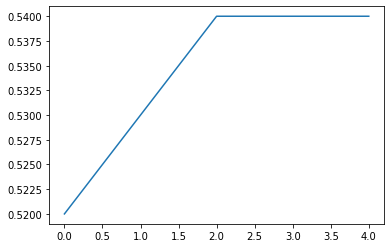

In [48]:
# accuracy 그래프 저장 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_' + 'accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_' + 'accuracy'])

fig = plt.gcf() 
plt.show()
fig.savefig('./model3_1st_accuracy')

In [44]:
# loss 그래프 저장 
plt.plot(history.history['loss'])
plt.plot(history.history['val_' + 'loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_' + 'loss'])

fig = plt.gcf() 
plt.show()
fig.savefig('./model3_1st_loss')

NameError: ignored